# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

Written work for Q1 can be found on my forked repo.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [1]:
! git clone https://github.com/ds3001f25/linear_models_assignment.git

Cloning into 'linear_models_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 18.05 KiB | 659.00 KiB/s, done.


In [2]:
cd linear_models_assignment/

/content/linear_models_assignment


In [3]:
%cd data/

/content/linear_models_assignment/data


In [4]:
ls -al

total 100
drwxr-xr-x 2 root root  4096 Oct  2 14:01 ./
drwxr-xr-x 4 root root  4096 Oct  2 14:01 ../
-rw-r--r-- 1 root root 88346 Oct  2 14:01 cars_hw.csv
-rw-r--r-- 1 root root  2322 Oct  2 14:01 heart_hw.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

3.1

In [7]:
heart = pd.read_csv('heart_hw.csv')
# calculate proportion of people who survive in the control group
control = heart[heart['transplant'] == 'control']
survive_control = control['y'].mean()

# calc proportion of people who survive in the treatment group
treatment_group = heart[heart['transplant'] == 'treatment']
survive_treatment = treatment_group['y'].mean()

# calc average treatment effect as difference in survival proportions
diff_survival = survive_treatment - survive_control

print(f"Proportion surviving in control group: {survive_control}")
print(f"Avg treatment effect: {diff_survival}")

Proportion surviving in control group: 0.11764705882352941
Avg treatment effect: 0.23017902813299232


3.2

In [ ]:
from sklearn.linear_model import LinearRegression

# convert transplant to a binary indicator
# control=0, treatment=1
heart['transplant_binary'] = (heart['transplant'] == 'treatment').astype(int)

# define independent var x with a constant/dependent y
X = heart[['transplant_binary']]
y = heart['y']

# fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# make intercept and coefficient
intercept = model.intercept_
coef_transplant = model.coef_[0]

print(f"Intercept (constant): {intercept}")
print(f"Coefficient on transplant: {coef_transplant}")


Intercept (constant): 0.1176470588235293
Coefficient on transplant: 0.23017902813299249


The constant (intercept) in the regression and the coefficient on transplant match my answers from part 1 because they are estimating the same values, the impact of treatment, using alternative approaches. The intercept (0.1176) from the second part is the survival rate for people who have zero treatment, which is equivalent to the estimated mean outcome (proportion surviving) for the control group. Likewise, the coefficient on the transplant is the difference in mean outcome for people who undergo treatment as opposed to not undergoing treatment. This is the same as the difference between treatment effects that we calculated in part 1.

3.3

In [ ]:
X = heart[['transplant_binary', 'age']]
y = heart['y']

# create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# extract intercept and coefficients
intercept = model.intercept_
coef_transplant = model.coef_[0]
coef_age = model.coef_[1]

print(f"Intercept (constant): {intercept}")
print(f"Coefficient on transplant: {coef_transplant}")
print(f"Coefficient on age: {coef_age}")

Intercept (constant): 0.7019569721740947
Coefficient on transplant: 0.2647016865036751
Coefficient on age: -0.013607217160218647


The intercept increases significantly once age is introduced as a variable, since the impact of age was previously muddling the impact of treatment on survival and biasing it and the intercept downward—this is because age is negatively correlated with survival. The intercept has moves upward once the negative impact of age has been accounted for.

3.4

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


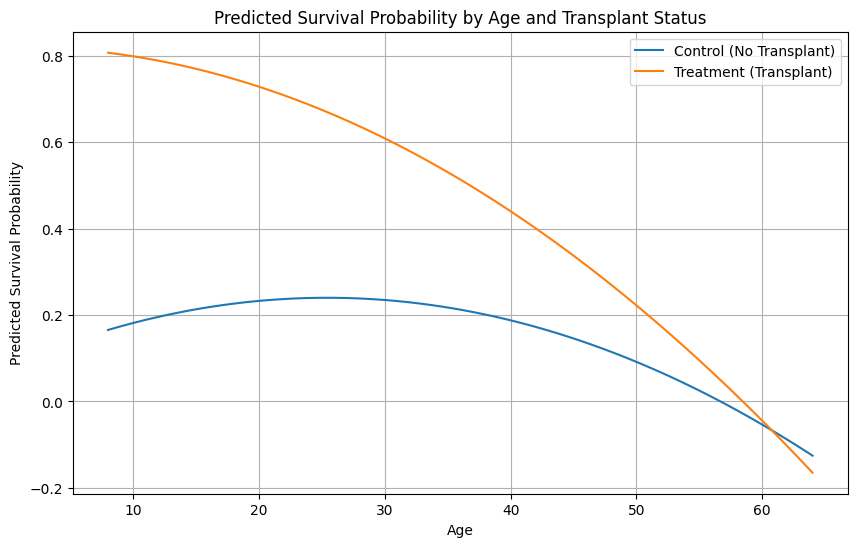

In [ ]:
from sklearn.model_selection import train_test_split

# create interaction and non-linear terms
heart['age_squared'] = heart['age'] ** 2
heart['interaction'] = heart['transplant_binary'] * heart['age']

# define feature set with transplant, age, age sqd, interaction
X = heart[['transplant_binary', 'age', 'age_squared', 'interaction']]
y = heart['y']

# split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# predict survival probability over a range of ages for treatment and control
ages = np.linspace(heart['age'].min(), heart['age'].max(), 100)
treatment = 1
control = 0

# helper function to create design matrix for prediction
def create_design_matrix(transplant_value):
    age_sq = ages ** 2
    interaction_term = transplant_value * ages
    df_pred = np.column_stack((np.full_like(ages, transplant_value), ages, age_sq, interaction_term))
    return df_pred

X_pred_treatment = create_design_matrix(treatment)
X_pred_control = create_design_matrix(control)

# predict survival probabilities
y_pred_treatment = model.predict(X_pred_treatment)
y_pred_control = model.predict(X_pred_control)

# plot results
plt.figure(figsize=(10,6))
plt.plot(ages, y_pred_control, label='Control')
plt.plot(ages, y_pred_treatment, label='Treatment')
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Predicted Survival Probability by Age and Transplant Status')
plt.legend()
plt.grid(True)
plt.show()

This graph indicates the relationship between age and survival probability based on the type of treatment elected (to have a transplant or not). At first, the treatment effect is very large in favor of getting a transplant—over 0.6, but the survival probability for the treatment group steadily decreases with the age of the patient and the control group's survival probability increases slightly before also falling with age.

The survival probability of treatment decreases much faster than the survival probability of the control group. The average treatment effect is fairly narrow after 50 years of age, and after around 60 years of age, it becomes safer to not elect to have a transplant. The survival probability even becomes negative after 60+, but this is impossible in actuality and more reflective of the limitations of using unrestricted polynomial and interaction terms in regressions.

3.5

I would be concerned about basing such serious medical decisions on exclusively model suggestions. First and foremost, reducing medical profiles to a spare list of characteristics and a survival probability leaves people vulnerable to being de-prioritized unfairly. For example, someone over the age of 45 could theoretically be deemed a worse recipient than a 20 year old if the decision is purely model-based, but that decision should change if the 45 year old is in incredible shape and the 20 year old is morbidly obese. Suddenly, it would seem that the 45 year old would be a better recipient with a higher likelihood of survival, but the model wouldn't indicate that. The model cannot functionally include all the information that a doctor would want to include in their decision, which might lead to biased organ allocation.

Second, the model itself might be trained on data that's not representative of the population. Furthermore, the use of any medical data to score models or patients presents privacy issues. It would require rigorous protections against misuse. I'm assuming many patients would not like to have their data be pooled in this manner, which also contributes to the misrepresentativty problem I outlined above.